https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
http://cxhernandez.com/tutorials/dataviz/2014/11/19/jointplot-d3.html

In [141]:
from astropy.io import fits
from astropy.io import ascii
from matplotlib import pyplot as plt
from astropy import constants as c
from astropy import units as u
import numpy as np

In [142]:
agc_path = '/Users/rfinn/Dropbox/Research/APPSS/SDSSphotcatalogs/'

#a100
agc_name = agc_path+'a100.code12.SDSSvalues190516.csv'
#agc_name = agc_path+'a100-SDSS-catalog-mco190725.fits'
mh_agc = ascii.read(agc_name)

#a100
#agc_name = agc_path+'a100.code12.SDSSvalues190516.csv'
agc_name = agc_path+'a100-SDSS-catalog-mco190725.fits'
agc = fits.getdata(agc_name,1)

# nsa
nsa_path = '/Users/rfinn/research/NSA/'
nsa_name = nsa_path+'nsa_v0_1_2.fits'
nsa = fits.getdata(nsa_name)
nsa_gi = nsa['ABSMAG'][:,3] - nsa['ABSMAG'][:,5]
h=.7
nsa_logstellarmassTaylor=1.15+0.70*(nsa['ABSMAG'][:,3]-nsa['ABSMAG'][:,5]) -0.4*(nsa['ABSMAG'][:,5]+ 5.*np.log10(h))

In [13]:
agc.columns

ColDefs(
    name = 'AGC'; format = 'J'
    name = 'objID'; format = 'K'; null = -9223372036854775808
    name = 'parentID'; format = 'K'; null = -9223372036854775808
    name = 'specObjID'; format = 'K'; null = -9223372036854775808
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'modelMag_u'; format = 'D'
    name = 'modelMag_g'; format = 'D'
    name = 'modelMag_r'; format = 'D'
    name = 'modelMag_i'; format = 'D'
    name = 'modelMag_z'; format = 'D'
    name = 'modelMagErr_u'; format = 'D'
    name = 'modelMagErr_g'; format = 'D'
    name = 'modelMagErr_r'; format = 'D'
    name = 'modelMagErr_i'; format = 'D'
    name = 'modelMagErr_z'; format = 'D'
    name = 'cModelMag_u'; format = 'D'
    name = 'cModelMag_g'; format = 'D'
    name = 'cModelMag_r'; format = 'D'
    name = 'cModelMag_i'; format = 'D'
    name = 'cModelMag_z'; format = 'D'
    name = 'cModelMagErr_u'; format = 'D'
    name = 'cModelMagErr_g'; format = 'D'
    name = 'cModelMagErr_r'; for

## Comparing Martha and Mary's Catalogs ##

* Martha's A100 catalog has 31503 sources.
* Mary's catalog has 31502 sources.
* Mary's catalog has one fewer source.

Going to use Mary's catalog because it has the AGC columns appended already.

In [17]:
print(len(mh_agc),len(agc))

31503 31502


In [18]:
nsa.columns

ColDefs(
    name = 'IAUNAME'; format = '19A'
    name = 'SUBDIR'; format = '27A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'ISDSS'; format = 'J'
    name = 'INED'; format = 'J'
    name = 'ISIXDF'; format = 'J'
    name = 'IALFALFA'; format = 'J'
    name = 'IZCAT'; format = 'J'
    name = 'ITWODF'; format = 'J'
    name = 'MAG'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'ZSRC'; format = '7A'
    name = 'SIZE'; format = 'E'
    name = 'RUN'; format = 'I'
    name = 'CAMCOL'; format = 'B'
    name = 'FIELD'; format = 'I'
    name = 'RERUN'; format = '3A'
    name = 'XPOS'; format = 'E'
    name = 'YPOS'; format = 'E'
    name = 'ZLG'; format = 'E'
    name = 'ZDIST'; format = 'E'
    name = 'ZDIST_ERR'; format = 'E'
    name = 'NSAID'; format = 'J'
    name = 'NMGY'; format = '7E'
    name = 'NMGY_IVAR'; format = '7E'
    name = 'OK'; format = 'I'
    name = 'RNMGY'; format = '7E'
    name = 'ABSMAG'; format = '7E'
    name = 'AMIVAR'; format = 

In [204]:
# define flag for keeping both samples
ramin = 120.
ramax = 240.
decmin = 0.
decmax = 36.
zmax = 0.05
ra = agc['ra']
dec = agc['dec']
redshift = agc['Vhelio']/c.c.value
keepagc = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax) & (redshift < .05) & (agc['modelMagErr_g'] < .01) & (agc['modelMagErr_i'] < .01)

# repeat for NSA
ra = nsa['RA']
dec = nsa['DEC']
redshift = nsa['ZDIST']

nsamagflag = (2.5*np.log10(np.sqrt(nsa['NMGY_IVAR'][:,3])) < .1) & (2.5*np.log10(np.sqrt(nsa['NMGY_IVAR'][:,5])) < .1)
nsamagflag = (nsa['NMGY'][:,3]/nsa['NMGY_IVAR'][:,3] > 20.) & (nsa['NMGY'][:,5]/nsa['NMGY_IVAR'][:,5] > 20.)
keepnsa = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax) & (redshift < .05) & nsamagflag & (nsa_gi > -1) & (nsa_gi < 2.5)



//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in 

### Plot g-i corrected vs stellar mass ###

In [75]:
sum(keepagc)

19101

//anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label'
  s)
//anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
//anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
//anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
//anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has

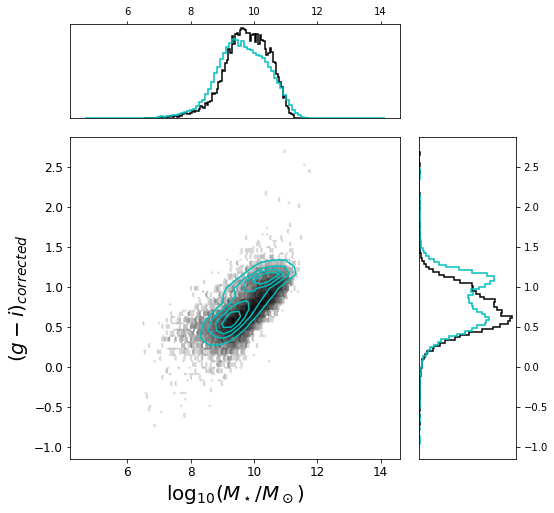

In [219]:
fig = plt.figure(figsize=(8,8))

nrow = 4
ncol = 4
# central panel
xvar = agc['LogMstarTaylor'][keepagc]
yvar = agc['gmi_corrected'][keepagc]

xvar2 = nsa_logstellarmassTaylor[keepnsa]
yvar2 = nsa_gi[keepnsa]


ax1 = plt.subplot2grid((nrow,ncol),(1,0),rowspan=nrow-1,colspan=ncol-1, fig=fig)
#plt.plot(xvar2,yvar2,'b.',alpha=.3, label='NSA')
#plt.plot(xvar,yvar,'k.',alpha=.1,label='AGC', zorder=2)


#t1 = plt.hist2d(xvar,yvar,bins=100,cmap='gray_r')
#H, xbins,ybins = np.histogram2d(xvar,yvar,bins=20)
#extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
#plt.contour(np.log10(H.T+1),  10, extent = extent, zorder=1,colors='k')
#plt.hexbin(xvar2,yvar2,bins='log',cmap='Blues', gridsize=100)
plt.hexbin(xvar,yvar,bins='log',cmap='gray_r', gridsize=75,label='AGC')
H, xbins,ybins = np.histogram2d(xvar2,yvar2,bins=40)
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
plt.contour((H.T), 5, extent = extent, zorder=1,colors='c', label='NSA')

#sns.kdeplot(agc['LogMstarTaylor'][keepagc],agc['gmi_corrected'][keepagc])#,bins='log',gridsize=200,cmap='blue_r')
#plt.colorbar()
#plt.legend()
plt.axis([7.9,11.6,-.05,2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\log_{10}(M_\star/M_\odot) $',fontsize=20)
plt.ylabel('$(g-i)_{corrected} $',fontsize=20)
plt.axis([7.9,11.6,-.05,2])
ax2 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=1,colspan=ncol-1, fig=fig, sharex = ax1, yticks=[])
t = plt.hist(xvar, normed=True, bins=100,color='k',histtype='step',lw=1.5)
t = plt.hist(xvar2, normed=True, bins=100,color='c',histtype='step',lw=1.5)
ax2.xaxis.tick_top()
ax3 = plt.subplot2grid((nrow,ncol),(1,ncol-1),rowspan=nrow-1,colspan=1, fig=fig, sharey = ax1, xticks=[])
t=plt.hist(yvar, normed=True, orientation='horizontal',bins=100,color='k',histtype='step',lw=1.5)
t=plt.hist(yvar2, normed=True, orientation='horizontal',bins=100,color='c',histtype='step',lw=1.5)
plt.yticks(rotation='horizontal')
ax3.yaxis.tick_right()
plt.savefig('agc-nsa-color-mass.png')

Text(336.971,0.5,'$(g-i)_{corrected} $')

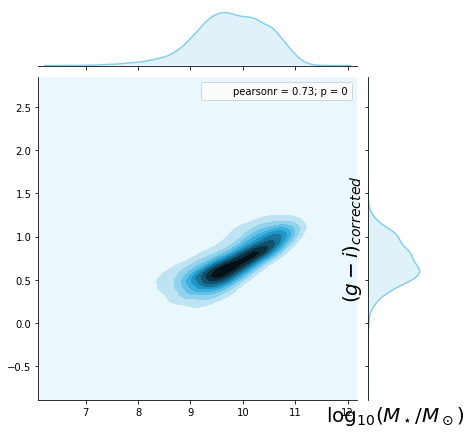

In [217]:
sns.jointplot(x=agc['LogMstarTaylor'][keepagc], y=agc['gmi_corrected'][keepagc], kind='kde', color="skyblue")
plt.xlabel('$\log_{10}(M_\star/M_\odot) $',fontsize=20)
plt.ylabel('$(g-i)_{corrected} $',fontsize=20)